<a href="https://colab.research.google.com/github/rooksandkings/me8873sta/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Participants:**

*   Margaret Armstrong
*   Jarred Fountain
*   Bhairav Ramanathan
*   Cydney Wong
*   Sara Bitarafan
*   Kai Ouyang
*   Noah Vrazel
*   Gabriella Rodriguez

Problem 1:<br>
a) <center> 
    $Z=X_2-X_1$<br><br>
    \begin{align}
    var[\bar{\mu_z}] &= E\big[\bar{\mu_z}-E[\bar{\mu_z}]\big]^2 \\
    &= E\big[\frac{1}{N}\Sigma_{i=1}^N Z_i - E[\frac{1}{N}\Sigma_{i=1}^N Z_i]\big]^2\\
    &= \frac{1}{N^2}E\big[\Sigma_{i=1}^N Z_i - N*E[Z]\big]^2 \\
    &= \frac{1}{N^2}E\big\{\big[Z_1-E[Z]\big] + \big[Z_2-E[Z]\big] + ⋯ \big \}^2 \\
    &= \frac{1}{N^2}\big\{E\big[Z_1 - E[Z_1]\big]^2 + E\big[Z_2 - E[Z_2]\big]^2 + ⋯\big\}\\
    &=\frac{1}{N^2}\big\{N*var(Z)\big\}\\
    &=\frac{1}{N}var(Z)\\
    &= \frac{1}{N}\big[var(X_2) - var(X_1)\big]
    \end{align}<br><br>
    \begin{align}
    \sigma_{\mu_z} &= \sqrt{var(\mu_z)}\\
    &= \frac{1}{\sqrt{N}}\big[\sigma_{X_2} - \sigma_{X_1}\big]
    \end{align}
   </center>

<center> 
    \begin{align}
    var[\bar{\mu_z}] &= E\big[\bar{\mu_z}-E[\bar{\mu_z}]\big]^2 \\
    &= \bar{\sigma_z} \\
    &= \frac{1}{\sqrt{N}}\sigma_z \\
    &= p(\bar{z}) \\
    &= p(\bar{z}) \\
    &= \frac{1}{\sqrt{2\pi}\sigma_\bar{z}}e^{-\frac{1}{2}}(\frac{\bar{z}-z}{\sigma_\bar{z}}) 
    \end{align}<br>
   </center>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp

# excel import requires fancy openpyxl
!pip install --upgrade openpyxl

In [ ]:
# Import all the XLSX, -O to overwrite if already exists
# Remember to import from RAW and not the github link to avoid the <html>

!wget -O data1-1.xlsx 'https://github.com/rooksandkings/me8873sta/raw/main/Data%20Locker/Datasets%20for%20Homework%201/data1-1.xlsx'

--2022-02-14 02:41:14--  https://github.com/rooksandkings/me8873sta/raw/main/Data%20Locker/Datasets%20for%20Homework%201/data1-1.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/data1-1.xlsx [following]
--2022-02-14 02:41:14--  https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/data1-1.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8846 (8.6K) [application/octet-stream]
Saving to: ‘data1-1.xlsx’

data1-1.xlsx        100%[===================>]   8.64K  --.-KB/

In [ ]:
import scipy.stats
from scipy.stats import sem
from scipy.stats import ttest_ind
# Read data into pandas (a system to manipulate data)
x_1, x_2 = pd.read_excel('data1-1.xlsx')['X1'], pd.read_excel('data1-1.xlsx')['X2']

# we set np.std(list, ddof=1) because scipy and matlab std uses ddof n-1, whereas numpy.std uses ddof n
s_1, s_2 = np.std(x_1, ddof=1), np.std(x_2, ddof=1)
n_1, n_2 = len(x_1), len(x_2)
mean_data_1_1_diff = np.mean(x_1) - np.mean(x_2)

# two sample t-test
pooled_variance = ((n_1 - 1) * s_1 ** 2 + (n_2 - 1) * s_2 ** 2)/(n_1 + n_2 - 2)
pooled_std = np.sqrt(pooled_variance)
same_variance_t_value = mean_data_1_1_diff / (np.sqrt(1 / n_1 + 1 / n_2) * pooled_std)
df = n_1 + n_2 - 2
# t_value = scipy.stats.t.ppf(q=0.05, df=df)
p_value = scipy.stats.t.sf(abs(same_variance_t_value), df=df)
print('same variance p_value: ', p_value * 2)
# null hypothesis is that tehre is a significant difference between mean of x_1 and x_2, 
# however, since p value (.02) < .05, we reject the null hypothesis

# manual unequal variance calculation:
df = (s_1 ** 2 / n_1 + s_2  ** 2 / n_2) ** 2 / (((s_1 ** 2 / n_1) ** 2/(n_1 - 1)) + 
                                                (s_2 ** 2/n_2) ** 2/(n_2 - 1))
manual_t_value = mean_data_1_1_diff / np.sqrt(sem(x_1) ** 2 + sem(x_2) ** 2)
p_value = scipy.stats.t.sf(abs(manual_t_value), df=df)
print('unequal variance p_value: ', p_value * 2)

# Calculate t-test (I think since they are independent samples, but we don't know if they have equal variance, we use Welch's t-test )
# https://stackoverflow.com/questions/13404468/t-test-in-pandas
# stat library
stat_t_value, p_value = ttest_ind(x_1, x_2, equal_var=False)
print('stat library p_value: ', p_value)
# null hypothesis is that there is a significant difference between mean of x_1 and x_2, 
# however, since p value (.02) < .05, we reject the null hypothesis

# The difference on t_value is due to whether or not we use the same variance or different variance 
# t-test, which has different degrees of freedom.

same variance p_value:  0.026458130075951967
unequal variance p_value:  0.028692936523593407
stat library p_value:  0.028692936523593376


Problem 1:<br>
b)

In [ ]:
import random

mean_true = np.mean(x_1 - x_2)
merge_lists = x_1.tolist() + x_2.tolist()

mean_perm_list = []

for i in range (0, 1000):

  random.shuffle(merge_lists)
  mean_x1_temp = np.mean(merge_lists[:int(len(merge_lists)/2)])
  mean_x2_temp = np.mean(merge_lists[int(len(merge_lists)/2):])
  mean_temp_diff = mean_x1_temp - mean_x2_temp
  mean_perm_list.append(mean_temp_diff)

two_tail_mean_mean_perm_list = np.mean([1 if i > np.abs(mean_true) else 0 for i in mean_perm_list]) #two tail
print('two tail:', two_tail_mean_mean_perm_list)
one_tail_mean_mean_perm_list = np.mean([1 if i > mean_true else 0 for i in mean_perm_list]) # one tail
print('one tail:', one_tail_mean_mean_perm_list)

# null hypothesis is that there is a significant difference between mean of x_1 and x_2, 
# however, since p value (.015) < .05, we reject the null hypothesis

two tail: 0.015
one tail: 0.985


Problem 2:

In [ ]:
# Read data into pandas (a system to manipulate data)
!wget -O data1-2.xlsx 'https://github.com/rooksandkings/me8873sta/raw/main/Data%20Locker/Datasets%20for%20Homework%201/data1-2.xlsx'
data_1_2 = pd.read_excel('data1-2.xlsx')

--2022-02-14 02:41:15--  https://github.com/rooksandkings/me8873sta/raw/main/Data%20Locker/Datasets%20for%20Homework%201/data1-2.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/data1-2.xlsx [following]
--2022-02-14 02:41:15--  https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/data1-2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8990 (8.8K) [application/octet-stream]
Saving to: ‘data1-2.xlsx’

data1-2.xlsx        100%[===================>]   8.78K  --.-KB/

In [ ]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import t
from sklearn.linear_model import LinearRegression
import statistics

x_1, x_2, y_1, y_2 = data_1_2['X1'].values, data_1_2['X2'].values, data_1_2['Y1'].values, data_1_2['Y2'].values
alpha = 0.05

def lin_reg_stats (x, y, alpha, dataset):
  # manual calculation
  model = LinearRegression()
  model.fit(x.reshape(-1, 1), y)
  ddof = len(y) - 2
  intercept, slope = model.intercept_, model.coef_
  Y = np.sqrt(statistics.variance(y - np.mean(y)))
  standard_error = Y / np.sqrt(np.sum((x - np.mean(x)) ** 2))

  t_value = slope / standard_error
  manual_p_value = t.sf(t_value, ddof) * 2


  # using stats library
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

  print(dataset, 'manual p_value:', manual_p_value[0], 'stat library p_value:', p_value)
  if p_value < alpha:
    print('p_value:', p_value, '< alpha:', alpha, 'thus we reject the null hypthosis that the slope of the regression line is equal to 0')
  else:
    print('p_value:', p_value, '> alpha:', alpha, 'thus we accept the null hypthosis that the slope of the regression line is equal to 0')


lin_reg_stats(x_1, y_1, alpha, 'data set 1:')
lin_reg_stats(x_2, y_2, alpha, 'data set 2:')



data set 1: manual p_value: 0.37281860719794974 stat library p_value: 0.37588697121029935
p_value: 0.37588697121029935 > alpha: 0.05 thus we accept the null hypthosis that the slope of the regression line is equal to 0
data set 2: manual p_value: 0.04645226123733489 stat library p_value: 0.007222379025052357
p_value: 0.007222379025052357 < alpha: 0.05 thus we reject the null hypthosis that the slope of the regression line is equal to 0


Matlab code can be found below courtesy of Noa

```
data = readcell('data1-2.xlsx');
data = data(2:end, :)
% ////////////////////////////////////////////////////////////////////////
% Organized imported data into their individual vectors for X1, Y1, X2, and
% Y2 and then calculated means for each
    X1 = cell2mat(data(:,1));
        meanX1 = mean(X1);
    Y1 = cell2mat(data(:,2));
        meanY1 = mean(Y1);
    X2 = cell2mat(data(:,3));
        meanX2 = mean(X2);
    Y2 = cell2mat(data(:,4));
        meanY2 = mean(Y2);
% ////////////////////////////////////////////////////////////////////////
% Implement lecture formulas for solving for B0 and B1 from our data
% populations
x1sum = 0;
y1sum = 0;
x2sum = 0;
y2sum = 0;
x1sum2 = 0;
x2sum2 = 0;
% Solve all of the summations of x - mean and y - mean for both 1st and 2nd
% datasets
for i = 1:1:length(X1)
        x1sum = x1sum + (X1(i) - meanX1)*(Y1(i) - meanX1);
%         y1sum = y1sum + (Y1(i) - meanX1);
        x1sum2 = x1sum2 + (X1(i) - meanX1)^2;
    
        x2sum = x2sum + (X2(i) - meanX2)*(Y2(i) - meanY2);
%         y2sum = y2sum + (Y2(i) - meanY1);
        x2sum2 = x2sum2 + (X2(i) - meanX2)^2;
end
% x1sum
% x2sum
% y1sum
% y2sum
% x1sum2
% x2sum2
%Calculate the estimates for B1 for both data sets
    B11 = x1sum / x1sum2
    B12 = x2sum / x2sum2
    
% With B1 values we can solve for B2 values 
    B12 = meanY1 - B11 * meanX1
    B22 = meanY2 - B12 * meanX2
    
    

% Found next function (fitlm) on Mathworks website : https://www.mathworks.com/help/stats/fitlm.html#:~:text=mdl%20%3D%20fitlm(%20X%20%2C%20y%20)%20returns%20a%20linear%20regression,to%20the%20data%20matrix%20X%20.
% The rest of the coding process for this part was all learned through help ftilm in matlab     
    out1 = fitlm(X1,Y1)
    out2 = fitlm(X2,Y2)
    est1 = out1.Coefficients
    est2 = out2.Coefficients
    intercept1 = est1{1,1};
    intercept2 = est2{2,1};
    check1 = ttest(intercept1)
    check2 = ttest(intercept2)
```


Matlab Code with plots from Gabriela: 

clc, clear; 

%Add data 

addpath 'Datasets for Homework 1'

%Read data and store it into a table

T=readtable('data1-2');

%Extract each of the variables

x1=T.X1; 
x2=T.X2;
y1=T.Y1; 
y2=T.Y2; 

N=length(x2); 

%Visualize the data

figure, hold on, plot(x1,y1,'-*'), plot(x2,y2,'-*'), hold off, legend('Y1','Y2'), title('Exercise 2 scatter plot'),ylabel('Y values'), xlabel('X values'), grid minor

%%%%%%%%%%%Custom least squares%%%%%%%%%%%

[b_1_1,b_0_1]=least_squares_custom(x1,y1,1,'X1 fit');

[b_1_2,b_0_2]=least_squares_custom(x2,y2,1,'X2 fit');

%%%%%%%%%%Matlab least squares%%%%%%%%%%%
c1 = polyfit(x1, y1, 1);
yFitted1 = polyval(c1, x1); 

c2 = polyfit(x2, y2, 1);
yFitted2 = polyval(c2, x1); 

figure, hold on, plot(x1,y1,'*'), plot(yFitted1), legend('y','y_{estimate}')
grid minor, title('Matlab least squares for X1, Y1')
txt1 = ['y = (' num2str(c1(1)) ')x + (' num2str(c1(2)) ')'];
text(5, 0, txt1);
hold off


figure, hold on, plot(x2,y2,'*'), plot(yFitted1), legend('y','y_{estimate}')
grid minor, title('Matlab least squares for X2, Y2')
txt2 = ['y = (' num2str(c2(1)) ')x + (' num2str(c2(2)) ')'];
text(5, 0, txt2);
hold off


%%%%%%%%%%Check if significantly different from 0%%%%%%%%%%%%

%%%FOR X1: 

%For B1: 


std_b1_1=std(y1)/sqrt(sum((x1-mean(x1)).^2));

stat_b1_1=normcdf(0,b_1_1,std_b1_1); 

%For B0: 

std_b0_1=mean(x1)*std_b1_1; 

stat_b0_1=normcdf(0,mean(y1)-mean(x1)*b_1_1,std_b1_1*mean(x1)); 


%For X1,Y1, the slope and intercept are significantly different than 0. 

%%%FOR X2: 

std_b1_2=std(y2)/sqrt(sum((x2-mean(x2)).^2));

stat_b1_2=normcdf(0,b_1_2,std_b1_2); 

%For B0: 

std_b0_2=mean(x2)*std_b1_2; 

stat_b0_2=normcdf(0,mean(y2)-mean(x2)*b_1_2,std_b1_2*mean(x2)); 

%%%%%%%%LEAST SQUARES CODING%%%%%%%%%%%

function[b_1,b_0]=least_squares_custom(x,y,bool,string)

%%%%%%%%%%%%%%%%%%%%%%%Documentation%%%%%%%%%%%%%%%%%

%x: independent variable. 

%y: dependent variable.

%bool: boolean value to display plots or not. 

%String: just for the title

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

b_1=sum((x-mean(x)).*(y-mean(y)))/sum((x-mean(x)).^2); 

b_0=mean(y)-b_1*mean(x); 

if bool==1

    figure
    hold on
    plot(x,y,'*')
    plot(x, x*b_1+b_0)
    legend('y','y_{estimate}')
    xlabel('X values')
    ylabel('Y values')
    grid minor, title(['Custom least squares', string])
    txt1 = ['y = (' num2str(b_1) ')x + (' num2str(b_0) ')'];
    text(5, 0, txt1);
    hold off
end 
end 

Problem 3:<br>
a)

In [ ]:
from numpy.linalg import inv
import copy

def find_theta(phi_matrix, y_matrix):
  # initialize matrix outside of loop
  P_inverse = np.zeros((2,2))
  for i in range(len(phi_matrix)):
    row = phi_matrix[i].reshape(-1, 1)
    row_transpose = row.T
    P_inverse += row * row_transpose

  P = inv(P_inverse)

  B = np.zeros((2,1))
  for i in range(len(y_matrix)):
    B_temp = phi_matrix[i].reshape(-1, 1) * y_matrix[i]
    B += B_temp

  theta_hat = np.dot(P, B)
  theta_1, theta_2 = theta_hat[0], theta_hat[1]
  # print(theta_1, theta_2)
  # return np.array([theta_1, theta_2]), P
  return theta_1, theta_2, P

In [ ]:
# First task: Process initial values
phi_matrix = np.array([[3, 2], [1, 1], [4, -6], [2, 1]])
y_matrix = np.array([6, 1, -3, 4])
# print(phi_matrix)
# print(y_matrix)
# print(np.shape(Pt_1))
# print(np.shape(phi_t))

theta1, theta2, P = find_theta(phi_matrix, y_matrix)

print('theta 1:', theta1, '\ntheta 2:', theta2)
print('p matrix \n', P)

theta 1: [1.11594203] 
theta 2: [1.23188406]
p matrix 
 [[0.04057971 0.01449275]
 [0.01449275 0.02898551]]


In [ ]:
# Second task: initialize next set of values and for Batch processing

phi_matrix_five = np.append(phi_matrix, [[2,2]], axis=0)
y_matrix_five = np.append(y_matrix, [3], axis=0)
# print(phi_matrix_five)
# print(y_matrix_five)

theta1, theta2, P = find_theta(phi_matrix_five, y_matrix_five)

print('theta 1:', theta1, '\ntheta 2:', theta2)
print('p matrix \n', P)

theta 1: [0.98198198] 
theta 2: [1.12612613]
p matrix 
 [[0.03187803 0.00762301]
 [0.00762301 0.02356202]]


In [ ]:
# Third Task: Now Compare with RLS initiated with previous values: 

theta1, theta2, P = find_theta(phi_matrix, y_matrix)# prev values of theta
theta_vector = [theta1, theta2]

#Add point
fi = np.array([2, 2])
P = P - (P * theta_vector * theta_vector * P)/(1 + np.transpose(fi) * P * fi)
error = 3 - fi.reshape(1, 2)@theta_vector
theta3 = theta_vector + P@fi.reshape(2, 1) * error/(1 + np.transpose(fi.reshape(2, 1))@P@fi.reshape(2, 1))

print('theta 3:', theta3) 

theta 3: [[0.98558263]
 [1.12861428]]


Q3 - Recursive Least Squares

MATLAB: 
%% Third Task: 
%To solve, we program the least squares recursive algorithm:

fi=[2;2]; 

P_t= P - (P*fi*transpose(fi)*P)/(1+transpose(fi)*P*fi);

error=3-transpose(fi)*theta;

theta3=theta+ P_t*fi*error/(1+transpose(fi)*P*fi); %Double check.

Problem 6:<br>
a)

In [233]:
# initial data import

# !wget -O Theta_1_Slow.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6b_slow/Theta_1_Slow.txt'
# !wget -O Theta_2_Slow.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6b_slow/Theta_2_Slow.txt'
# !wget -O Theta_3_Slow.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6b_slow/Theta_3_Slow.txt'

!wget -O u_Slow.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6a/u_Slow.txt'
!wget -O y_Slow.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6a/y_Slow.txt'

!wget -O u_3.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6b/u_3.txt'
!wget -O y_3.txt 'https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6b/y_3.txt'

--2022-02-14 03:10:21--  https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6a/u_Slow.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 544 [text/plain]
Saving to: ‘u_Slow.txt’

u_Slow.txt          100%[===================>]     544  --.-KB/s    in 0s      

2022-02-14 03:10:21 (40.0 MB/s) - ‘u_Slow.txt’ saved [544/544]

--2022-02-14 03:10:21--  https://raw.githubusercontent.com/rooksandkings/me8873sta/main/Data%20Locker/Datasets%20for%20Homework%201/Data%201-6a/y_Slow.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [237]:
# read in data to pandas:
from numpy import genfromtxt

u_slow = (pd.read_csv('u_Slow.txt', header=None)).values.flatten()
y_slow = (pd.read_csv('y_Slow.txt', header=None)).values.flatten()

u_slow = np.reshape(u_slow, (len(u_slow),1))
y_slow = np.reshape(y_slow, (len(y_slow),1))

u_3 = (pd.read_csv('u_3.txt', header=None)).values.flatten()
y_3 = (pd.read_csv('y_3.txt', header=None)).values.flatten()

u_3 = np.reshape(u_3,(len(u_3),1))
y_3 = np.reshape(y_3,(len(y_3),1))

In [217]:
def rls (y_t, phi, alpha, m):
  # initialize matricies
  P, theta, P_times_phi  = [[]], [[]], [[]]
  P[0], theta[0] = np.identity(m), np.zeros((m,1))

  for t in range(1, len(y_t)):
    phi_t = phi[t-1 : t-1 + m]
    P_t_top = P[t-1]@phi_t@phi_t.T@P[t-1]
    P_t_bottom = alpha + phi_t.T@P[t-1]@phi_t
    P_t_full = 1 / alpha * (P[t-1] - P_t_top / P_t_bottom)
    P.append(P_t_full)

    theta_t_top = P[t-1]@phi_t
    theta_t_bottom = alpha + phi_t.T@P[t-1]@phi_t
    theta_t_right = y_t[t-1] - phi_t.T@theta[t-1]
    theta_t_full = theta[t-1] + (theta_t_top / theta_t_bottom) * theta_t_right
    theta.append(theta_t_full)
  
  # print(theta)
  return P, theta

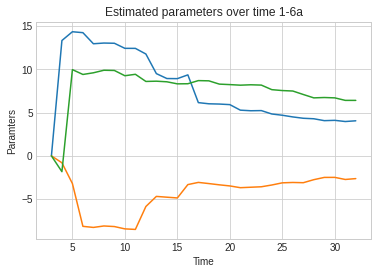

In [218]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

alpha = 0.9
m = 3 # third order FIR model 
P, theta = rls(y_slow, u_slow, alpha, m)

fig = plt.figure()
ax = plt.axes()

plt.title("Estimated parameters over time 1-6a")
plt.xlabel("Time")
plt.ylabel("Paramters");

x = np.linspace(m, len(y_slow) + m - 1, len(y_slow))
y = np.concatenate(theta, axis=1)
ax.plot(x, y.T)

Problem 6:<br>
b)

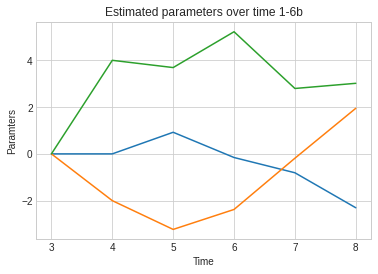

In [238]:
alpha = 0.99 # faster alpha
m = 3 # third order FIR model 
P, theta = rls(y_3, u_3, alpha, m)

fig = plt.figure()
ax = plt.axes()

plt.title("Estimated parameters over time 1-6b")
plt.xlabel("Time")
plt.ylabel("Paramters");

x = np.linspace(m, len(y_3) + m - 1, len(y_3))
y = np.concatenate(theta, axis=1)
ax.plot(x, y.T)